In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
df = pd.read_csv('UML_2024.csv')
df.iloc[:,1:].describe()

,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,Fraction_of_rotatable_bonds,...,Number_of_OSO_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.0,300.000000,300.000000,300.000000,300.000000,299.000000,300.000000,300.000000,300.000000,300.000000
mean,334.807295,7.927830,30.133333,4.460000,1.433333,1.493333,0.323333,0.553333,0.043333,0.183552,...,0.0,0.013333,75.364767,11.474213,0.945957,12.222353,19.532942,8.188036,268.383333,291.973333
std,142.954809,6.127177,18.272800,1.224772,0.864898,1.169551,0.522525,0.925569,0.285881,0.134907,...,0.0,0.163026,22.637438,3.635444,0.169270,8.281095,8.096676,3.568366,176.785634,207.521283
min,122.115432,-1.765100,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,26.300000,6.792787,0.000000,5.665398,7.111111,3.164062,59.000000,62.000000
25%,185.874997,2.399200,13.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.051282,...,0.0,0.000000,60.360000,8.287358,0.967964,7.686705,11.076923,5.612245,95.000000,90.750000
50%,352.385992,6.627100,27.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.181818,...,0.0,0.000000,69.495000,11.217634,0.970923,10.949384,22.166238,7.527734,230.000000,233.000000
75%,456.710990,13.571075,48.000000,5.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.285714,...,0.0,0.000000,85.400000,13.765704,1.007529,13.675099,25.641274,10.681295,462.000000,534.000000
max,917.629981,40.375700,118.000000,9.000000,4.000000,5.000000,2.000000,4.000000,2.000000,0.576923,...,0.0,2.000000,161.800000,38.162784,1.085336,89.461191,56.908163,28.296312,1008.000000,1066.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cid                            300 non-null    int64  
 1   Molecular_weight               300 non-null    float64
 2   LogP                           300 non-null    float64
 3   Number_of_HBA_1                300 non-null    int64  
 4   Number_of_HBA_2                300 non-null    int64  
 5   Number_of_HBD_1                300 non-null    int64  
 6   Number_of_HBD_2                300 non-null    int64  
 7   Number_of_acidic_groups        300 non-null    int64  
 8   Number_of_aliphatic_OH_groups  300 non-null    int64  
 9   Number_of_basic_groups         300 non-null    int64  
 10  Fraction_of_rotatable_bonds    300 non-null    float64
 11  Number_of_heavy_bonds          300 non-null    int64  
 12  Number_of_heterocycles         300 non-null    int

In [21]:
#Vemos que existe un valor nulo dentro de nuestro dataset
#Como son pocos valores realizamos la técnica de inputación para no perder la data
median_value = df['Geometrical_shape_coefficient'].median()
df['Geometrical_shape_coefficient'].fillna(median_value, inplace=True)

In [22]:
#Verificamos si la inputación fue realizada correctamente
print(df['Geometrical_shape_coefficient'].isnull().sum())

0


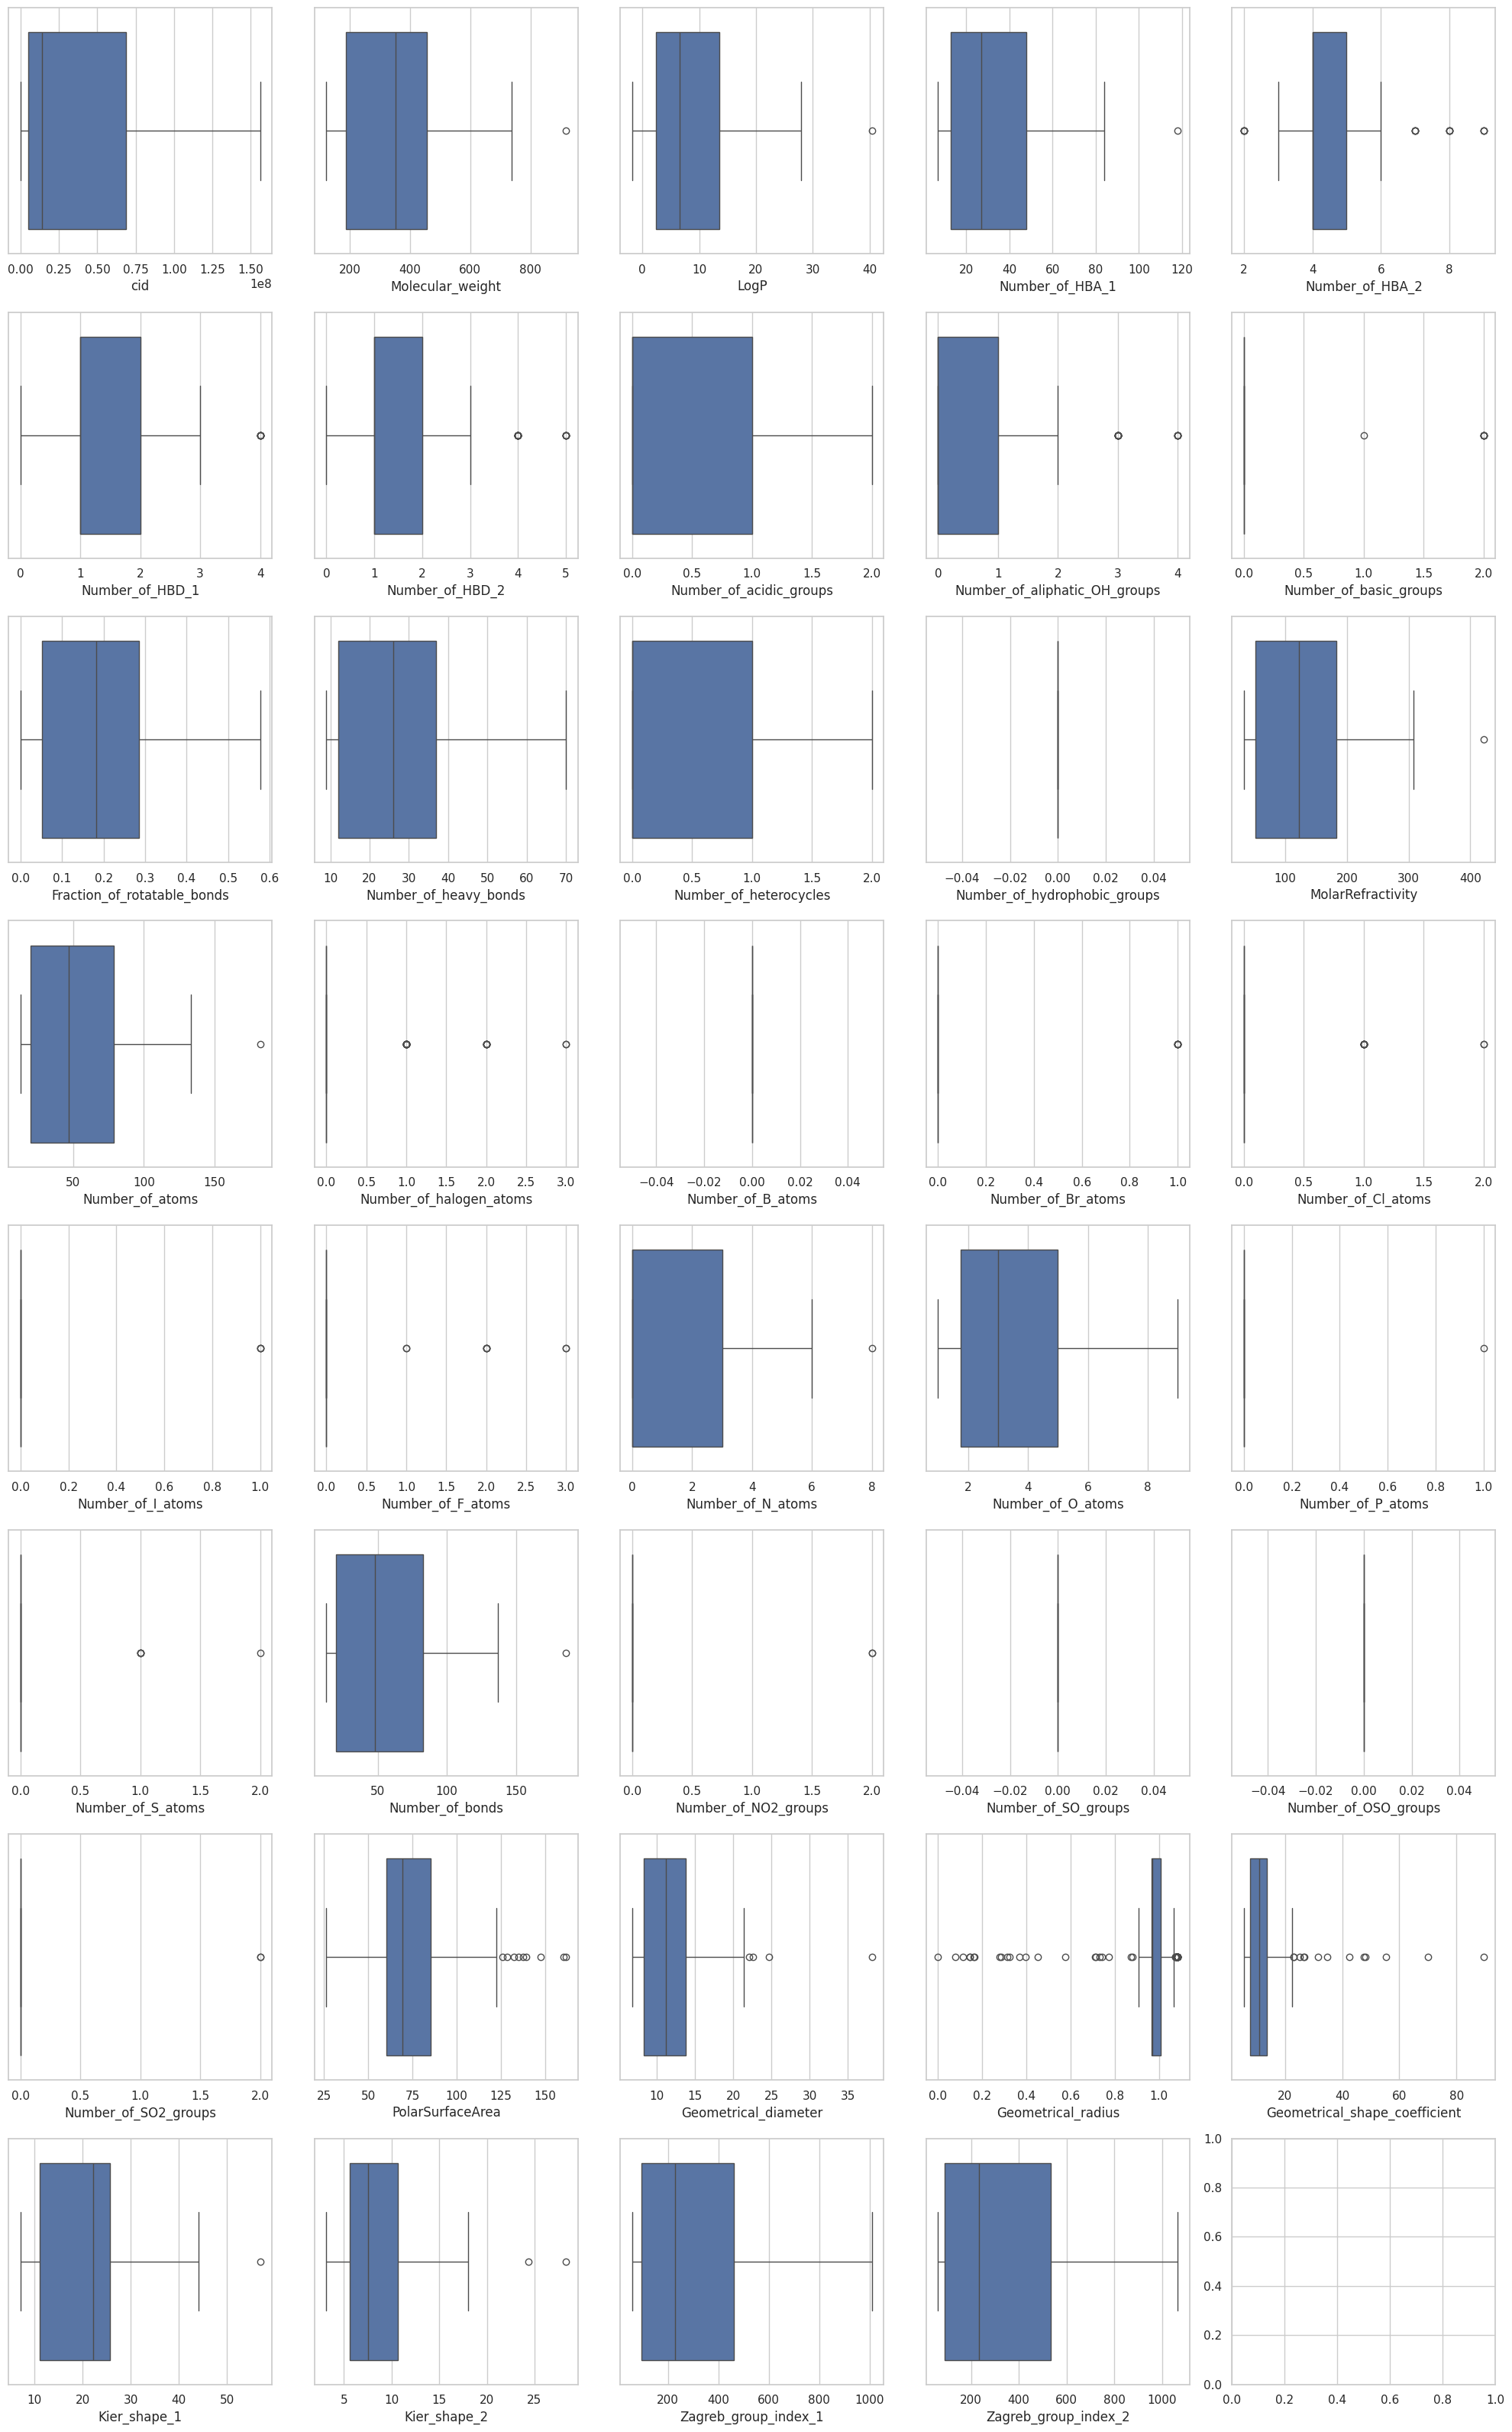

In [23]:
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Calcular el número de filas y columnas para los subplots
num_cols = df.shape[1]
num_rows = (num_cols - 1) // 5 + 1

# Crear subplots para cada variable
fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(20, 4*num_rows))

# Iterar sobre cada columna del DataFrame y crear un boxplot
for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i//5, i%5])

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar el plot
plt.show()


In [34]:
#Drop columns with no variation so model is not meaningfully affected by these constant parameters

# List of columns with no variation
columns_to_drop = ['Number_of_basic_groups', 'Number_of_hydrophobic_groups', 'Number_of_halogen_atoms',
                   'Number_of_B_atoms', 'Number_of_Br_atoms', 'Number_of_Cl_atoms', 'Number_of_I_atoms',
                   'Number_of_F_atoms', 'Number_of_P_atoms', 'Number_of_S_atoms', 'Number_of_bonds',
                   'Number_of_NO2_groups', 'Number_of_SO_groups', 'Number_of_OSO_groups', 'Number_of_SO2_groups']

# Drop columns with no variation
df_filtered = df.drop(columns=columns_to_drop)


<ipython-input-35-1cfce84266bd>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', 30)
<ipython-input-35-1cfce84266bd>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,fontsize=9)
<ipython-input-35-1cfce84266bd>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels,fontsize=9)


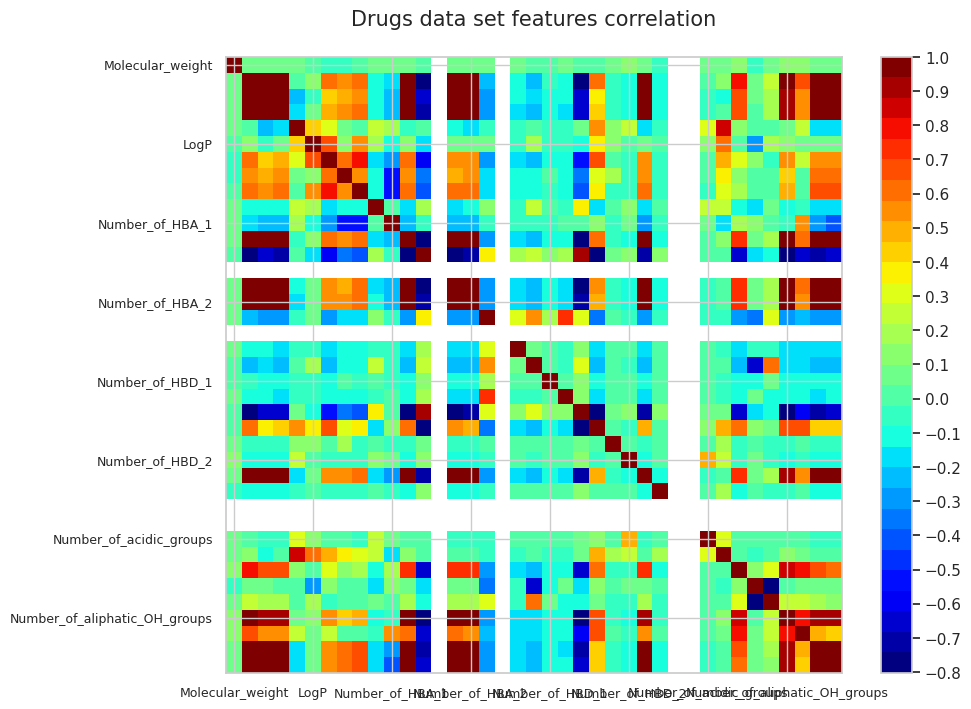

In [35]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(10,8))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Drugs data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

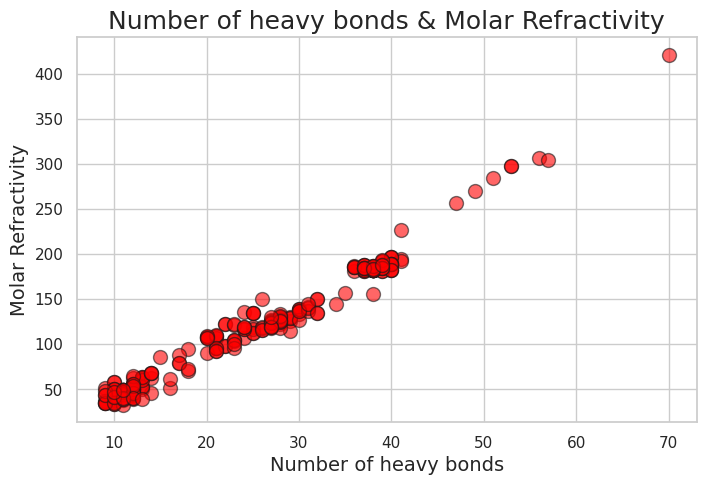

In [36]:
plt.figure(figsize=(8,5))
plt.title("Number of heavy bonds & Molar Refractivity",fontsize=18)
plt.xlabel ("Number of heavy bonds",fontsize=14)
plt.ylabel ("Molar Refractivity",fontsize=14)
plt.grid(True)
plt.scatter(df['Number_of_heavy_bonds'],df['MolarRefractivity'],color='red',edgecolor='k',alpha=0.6, s=100)
plt.show()

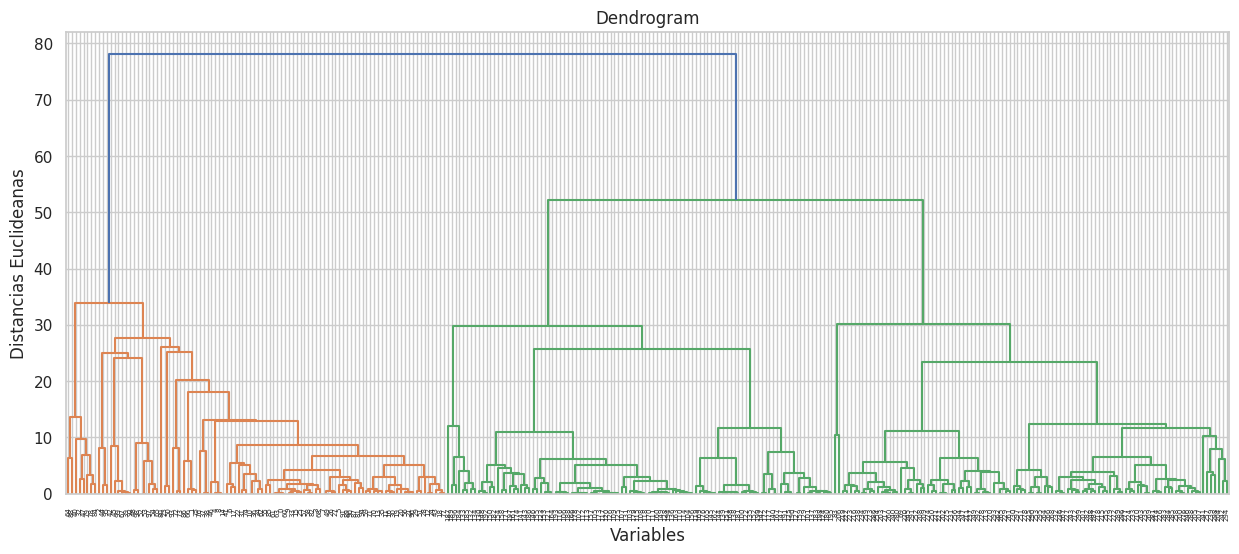

In [39]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Variables')
plt.ylabel('Distancias Euclideanas')
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
X = df.drop('cid',axis=1)
y = df['cid']

In [28]:
X = scaler.fit_transform(X)

In [29]:
dfx = pd.DataFrame(data=X,columns=df.columns[1:])

In [30]:
dfx.head(10)

,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,Fraction_of_rotatable_bonds,...,Number_of_OSO_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,-1.483308,-1.120595,-1.158478,-0.376208,-0.501859,-1.278977,-0.619824,-0.598829,-0.151831,-0.537862,...,0.0,-0.081923,-0.287383,-1.224219,0.366010,-0.756203,-1.536752,-1.389049,-1.163706,-1.105216
1,-1.188731,-1.048108,-0.939208,1.259478,0.656278,-1.278977,-0.619824,-0.598829,6.855774,-0.125368,...,0.0,-0.081923,1.410871,-0.634971,0.342260,-0.494696,-1.169047,-0.926099,-1.039054,-1.003853
2,-0.488755,-1.584600,-1.048843,-1.194050,-0.501859,-1.278977,1.297158,-0.598829,-0.151831,-0.620361,...,0.0,-0.081923,-0.686061,-1.224683,-4.642486,3.674141,-1.055643,-0.953044,-1.044720,-1.018333
3,-1.377959,-1.094814,-1.048843,-1.194050,-0.501859,-1.278977,-0.619824,-0.598829,-0.151831,-0.620361,...,0.0,-0.081923,-0.686061,-1.214275,0.360089,-0.751020,-1.414413,-1.341717,-1.044720,-1.018333
4,-1.241955,-1.033885,-1.213296,-0.376208,-0.501859,-1.278977,-0.619824,-0.598829,-0.151831,-0.620361,...,0.0,-0.081923,-0.287383,-1.054675,0.366899,-0.682365,-1.414413,-1.341717,-1.158040,-1.090736
5,-1.378099,-1.102661,-1.048843,0.441635,0.656278,-0.422519,-0.619824,-0.598829,-0.151831,0.122128,...,0.0,-0.081923,0.244925,-1.194875,0.418823,-0.750932,-1.414413,-1.175617,-1.112712,-1.061775
6,-1.371204,-1.167890,-1.158478,0.441635,0.656278,0.433939,1.297158,-0.598829,-0.151831,0.122128,...,0.0,-0.081923,0.113950,-1.198049,0.176691,-0.716698,-1.414413,-1.175617,-1.141042,-1.076255
7,-1.371204,-1.245101,-1.213296,-0.376208,-0.501859,-0.422519,-0.619824,-0.598829,-0.151831,-0.620361,...,0.0,-0.081923,0.334307,-1.227302,0.389153,-0.760811,-1.414413,-1.341717,-1.129710,-1.061775
8,-1.241955,-1.033885,-1.213296,-0.376208,-0.501859,-1.278977,-0.619824,-0.598829,-0.151831,-0.620361,...,0.0,-0.081923,-0.287383,-1.224598,0.387995,-0.759472,-1.414413,-1.341717,-1.158040,-1.090736
9,-1.385022,-1.008660,-1.048843,-0.376208,-0.501859,-1.278977,-0.619824,-0.598829,-0.151831,-0.620361,...,0.0,-0.081923,-0.287383,-1.226288,0.383431,-0.759565,-1.414413,-1.341717,-1.073050,-1.047294


In [31]:
dfx.describe()

,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,Fraction_of_rotatable_bonds,...,Number_of_OSO_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
count,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,300.000000,300.000000,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,...,300.0,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,300.000000,300.000000,3.000000e+02,300.000000,3.000000e+02
mean,1.421085e-16,9.473903e-17,7.105427e-17,1.184238e-17,0.000000,0.000000,9.473903e-17,3.552714e-17,2.368476e-17,9.473903e-17,...,0.0,-1.480297e-17,1.776357e-17,-3.315866e-16,4.500104e-16,0.000000,0.000000,9.473903e-17,0.000000,-7.105427e-17
std,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671,1.001671,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,...,0.0,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671,1.001671,1.001671e+00,1.001671,1.001671e+00
min,-1.490312e+00,-1.584600e+00,-1.268114e+00,-2.011893e+00,-1.659997,-1.278977,-6.198241e-01,-5.988294e-01,-1.518315e-01,-1.362849e+00,...,0.0,-8.192319e-02,-2.171038e+00,-1.289869e+00,-5.597778e+00,-0.793905,-1.536752,-1.410272e+00,-1.186370,-1.110043e+00
25%,-1.043555e+00,-9.038204e-01,-9.392080e-01,-3.762076e-01,-0.501859,-0.422519,-6.198241e-01,-5.988294e-01,-1.518315e-01,-9.820860e-01,...,0.0,-8.192319e-02,-6.639372e-01,-8.780716e-01,1.302259e-01,-0.545627,-1.046127,-7.230465e-01,-0.982393,-9.712717e-01
50%,1.231723e-01,-2.126434e-01,-1.717618e-01,-3.762076e-01,-0.501859,-0.422519,-6.198241e-01,-5.988294e-01,-1.518315e-01,-1.287001e-02,...,0.0,-8.192319e-02,-2.597279e-01,-7.069500e-02,1.477376e-01,-0.153715,0.325775,-1.853522e-01,-0.217481,-2.846545e-01
75%,8.541677e-01,9.225576e-01,9.794076e-01,4.416350e-01,0.656278,0.433939,1.297158e+00,4.833924e-01,-1.518315e-01,7.585468e-01,...,0.0,-8.192319e-02,4.440432e-01,6.313726e-01,3.643578e-01,0.175946,0.755685,6.998793e-01,1.097036,1.168223e+00
max,4.083784e+00,5.304577e+00,4.816639e+00,3.713005e+00,2.972552,3.003313,3.214140e+00,3.730058e+00,6.855774e+00,2.920739e+00,...,0.0,1.220656e+01,3.824623e+00,7.353480e+00,8.247897e-01,9.358519,4.623832,5.644565e+00,4.190682,3.736098e+00


Importación y análisis de clases de PCA

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import pandas as pd

# Crear un DataFrame con los datos originales
df_original = pd.DataFrame(data=X, columns=X.columns)

# Escalar los datos con StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear un DataFrame con los datos escalados
df_scaled = pd.DataFrame(data=X_scaled, columns=df_original.columns)

# Aplicar PCA
pca = PCA(n_components=None)
df_pca = pca.fit_transform(df_scaled)

# Ahora puedes continuar con el análisis utilizando df_pca


AttributeError: 'numpy.ndarray' object has no attribute 'columns'